# HW02 — ChBE 413
**Name:** Mikkel Flores  
**Due Date:** September 11, 2025

# Question 1: Processing and Visualizing Molecular Datasets with Pandas

In [205]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

**Part a**

In [206]:
df = pd.read_csv("Tm_200_subset_raw.csv")
df.head()


,smiles,Tm,num_atms,dipole,quadrupole
0,CC1=C(C=CC(O)=N1)[N+]([O-])=O,508.15,17.0,4.473978,23.191697
1,COC1=C(N)C=C(C=C1)C(=O)N(C)C,393.15,28.0,4.772571,21.767880
2,CC1=CC=C(Cl)C(N)=C1,303.95,17.0,2.216088,7.920099
3,BrC1(C(=O)C2=CC=CC=C2C1=O)C1=CC=CC=C1,379.15,27.0,3.919235,21.700726
4,NC1=C(Cl)C=C(Cl)C=C1I,353.15,14.0,2.157331,4.988358


In [207]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 12


In [208]:
df.drop_duplicates()

,smiles,Tm,num_atms,dipole,quadrupole
0,CC1=C(C=CC(O)=N1)[N+]([O-])=O,508.15,17.0,4.473978,23.191697
1,COC1=C(N)C=C(C=C1)C(=O)N(C)C,393.15,28.0,4.772571,21.767880
2,CC1=CC=C(Cl)C(N)=C1,303.95,17.0,2.216088,7.920099
3,BrC1(C(=O)C2=CC=CC=C2C1=O)C1=CC=CC=C1,379.15,27.0,3.919235,21.700726
4,NC1=C(Cl)C=C(Cl)C=C1I,353.15,14.0,2.157331,4.988358
...,...,...,...,...,...
208,O=CC1=CN=C(S1)N1CCOCC1,437.15,23.0,4.874555,18.470379
209,CC(C)N(C)S(=O)(=O)C1=CC(N)=C(C)C=C1,391.15,34.0,NaN,21.523472
210,NC1=C(N=CN=C1)N1CCCC1,430.15,2400.0,3.889375,11.228281
211,CC(=O)N[C@@H](CC(O)=O)C(N)=O,433.15,22.0,3.437255,11.903019


**Part b**

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   smiles      213 non-null    object 
 1   Tm          213 non-null    float64
 2   num_atms    210 non-null    float64
 3   dipole      205 non-null    float64
 4   quadrupole  213 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.4+ KB


In [210]:
df.isnull().sum()


smiles        0
Tm            0
num_atms      3
dipole        8
quadrupole    0
dtype: int64

There are 3 entries missing in the num_atms column and 8 entries missing in the dipole column.

**Part c**

In [211]:
mean_col_vals = df[['Tm', 'num_atms', 'dipole', 'quadrupole']].mean()
print("The mean column values:",
      "\n", mean_col_vals)

The mean column values: 
 Tm            419.614930
num_atms       38.090476
dipole         23.218965
quadrupole    301.074375
dtype: float64


In [212]:
# Checking skewness and percentage of missing values
df_skew = df[['Tm', 'num_atms', 'dipole', 'quadrupole']].skew()
df_missing = (df[['Tm', 'num_atms', 'dipole', 'quadrupole']].isnull().mean()*100).round(2)
print("Skewness of the columns:"
      , "\n", df_skew
      , "\n\nPercentage of missing values in the columns:"
      , "\n", df_missing)

Skewness of the columns: 
 Tm            11.555019
num_atms      14.412902
dipole        14.316706
quadrupole    14.594364
dtype: float64 

Percentage of missing values in the columns: 
 Tm            0.00
num_atms      1.41
dipole        3.76
quadrupole    0.00
dtype: float64


Mean imputation is not necessarily a good approximation here because the columns show high positive skew, which demonstrates that the mean is not representative and may bias results. The article notes that mean imputation does not account for correlations between features, so approximating with the column means ignores those relationships, subsequently worsening models or further multivariate analyses. Even though the percentage of missing values is small, imputation with the mean reduces the variance and can artifically make a model more confident since uncertainty is not accounted for these imputations.

**Part d**

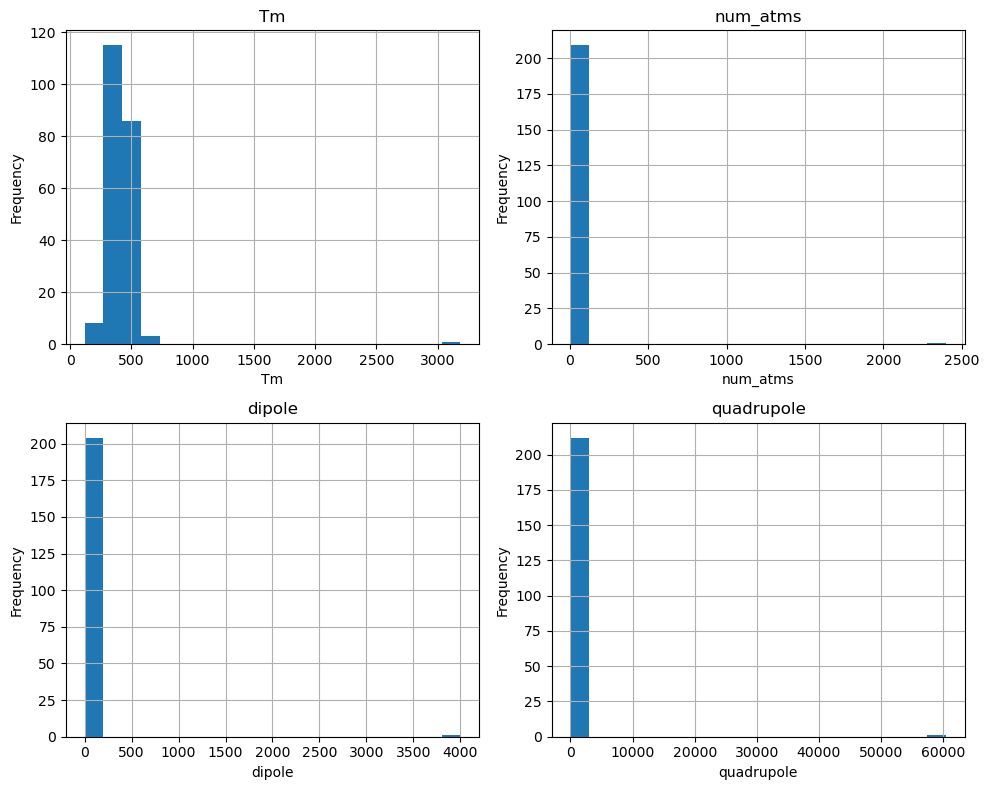

In [213]:
import matplotlib.pyplot as plt
cols = ['Tm', 'num_atms', 'dipole', 'quadrupole']
num_cols = len(cols)
num_plots_per_col = 2
num_plots_per_row = (num_cols + num_plots_per_col -1) // num_plots_per_col

fig, axes = plt.subplots(num_plots_per_row, num_plots_per_col, figsize=(10, 4*num_plots_per_row))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    df[col].hist(bins=20, ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(True)
    
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [214]:
description = df[cols].describe().transpose()
print(description.to_string())

            count        mean          std         min         25%         50%         75%           max
Tm          213.0  419.614930   205.510776  119.150000  361.150000  413.150000  451.150000   3186.500000
num_atms    210.0   38.090476   164.061916    5.000000   20.000000   25.500000   31.750000   2400.000000
dipole      205.0   23.218965   279.247777    0.000000    2.371265    3.486184    5.003426   4001.832900
quadrupole  213.0  301.074375  4141.268430    0.366284    9.455462   15.351293   22.387872  60456.931093


In [215]:
means = description['mean']
stds = description['std']
outlier_mult = 3
flag_mask = pd.Series(False, index=df.index)

for c in cols:
    lower_bound = means[c] - outlier_mult * stds[c]
    upper_bound = means[c] + outlier_mult * stds[c]
    outliers = (df[c] < lower_bound) | (df[c] > upper_bound)
    print(f"{c}: flagged {outliers.sum()} rows (bounds {lower_bound:.2f} .. {upper_bound:.2f})")
    flag_mask |= outliers

flagged = df.loc[flag_mask, ['smiles'] + cols]
print("\nFlagged rows:", len(flagged))
display(flagged)
print("\nIndices to drop:", flagged.index.tolist())

Tm: flagged 1 rows (bounds -196.92 .. 1036.15)
num_atms: flagged 1 rows (bounds -454.10 .. 530.28)
dipole: flagged 1 rows (bounds -814.52 .. 860.96)
quadrupole: flagged 1 rows (bounds -12122.73 .. 12724.88)

Flagged rows: 4


,smiles,Tm,num_atms,dipole,quadrupole
13,O=CC1=CC=CC=C1N1CCOCC1,3186.50,27.0,3.318658,15.881392
26,CS(=O)(=O)C1=CC=C(C=C1)C(O)C(CO)NC(=O)C(Cl)Cl,438.15,36.0,4001.832900,27.426057
191,COC(=O)C1=CC=C(I)C=C1O,342.15,19.0,2.664381,60456.931093
210,NC1=C(N=CN=C1)N1CCCC1,430.15,2400.0,3.889375,11.228281



Indices to drop: [13, 26, 191, 210]


In [216]:
display(df.loc[flagged.index, ['smiles'] + cols])
print("\nSMILES and indices of dropped rows:")
print("SMILES list:", df.loc[flagged.index, 'smiles'].tolist())
print("Indices:", flagged.index.tolist())

,smiles,Tm,num_atms,dipole,quadrupole
13,O=CC1=CC=CC=C1N1CCOCC1,3186.50,27.0,3.318658,15.881392
26,CS(=O)(=O)C1=CC=C(C=C1)C(O)C(CO)NC(=O)C(Cl)Cl,438.15,36.0,4001.832900,27.426057
191,COC(=O)C1=CC=C(I)C=C1O,342.15,19.0,2.664381,60456.931093
210,NC1=C(N=CN=C1)N1CCCC1,430.15,2400.0,3.889375,11.228281



SMILES and indices of dropped rows:
SMILES list: ['O=CC1=CC=CC=C1N1CCOCC1', 'CS(=O)(=O)C1=CC=C(C=C1)C(O)C(CO)NC(=O)C(Cl)Cl', 'COC(=O)C1=CC=C(I)C=C1O', 'NC1=C(N=CN=C1)N1CCCC1']
Indices: [13, 26, 191, 210]


In [217]:
df.drop(index=flagged.index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.to_csv("Tm_200_subset_cleaned.csv", index=False)
print("rows after cleaning:", len(df))

rows after cleaning: 209


**Part e**

In [218]:
df_clean = pd.read_csv("Tm_200_subset_cleaned.csv")
df_clean.drop_duplicates(inplace=True)
df_clean.head()
df_clean.info()
print("\nNaN Values:", "\n", df_clean.isnull().sum())
print("\nDuplicated Values:", df_clean.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 208
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   smiles      197 non-null    object 
 1   Tm          197 non-null    float64
 2   num_atms    194 non-null    float64
 3   dipole      189 non-null    float64
 4   quadrupole  197 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.2+ KB

NaN Values: 
 smiles        0
Tm            0
num_atms      3
dipole        8
quadrupole    0
dtype: int64

Duplicated Values: 0


In [219]:
cols = ['Tm', 'num_atms', 'dipole', 'quadrupole']

corr = df_clean[cols].corr(method='pearson')
print("Pearson correlation matrix:\n", corr)

Pearson correlation matrix:
                   Tm  num_atms    dipole  quadrupole
Tm          1.000000  0.107806  0.332250    0.358435
num_atms    0.107806  1.000000  0.105737    0.367393
dipole      0.332250  0.105737  1.000000    0.351995
quadrupole  0.358435  0.367393  0.351995    1.000000


From the Pearson correlation matrix, it seems that the two columns most correlated to each other are num_atms and quadrupole with an r value of 0.367. The least correlated pair seems to be num_atms and dipole (r = 0.106). All pairwise Pearson r values are positive, indicating there are no anti-correlations between any of the columns.

In [220]:
# Showing pairwise counts of non-NaN values
print("\nPairwise counts of non-NaN values:")
for i in cols:
    for j in cols:
        print(f"{i:11s} vs {j:11s}: {df_clean[[i, j]].dropna().shape[0]}")


Pairwise counts of non-NaN values:
Tm          vs Tm         : 197
Tm          vs num_atms   : 194
Tm          vs dipole     : 189
Tm          vs quadrupole : 197
num_atms    vs Tm         : 194
num_atms    vs num_atms   : 194
num_atms    vs dipole     : 186
num_atms    vs quadrupole : 194
dipole      vs Tm         : 189
dipole      vs num_atms   : 186
dipole      vs dipole     : 189
dipole      vs quadrupole : 189
quadrupole  vs Tm         : 197
quadrupole  vs num_atms   : 194
quadrupole  vs dipole     : 189
quadrupole  vs quadrupole : 197


**Part f**

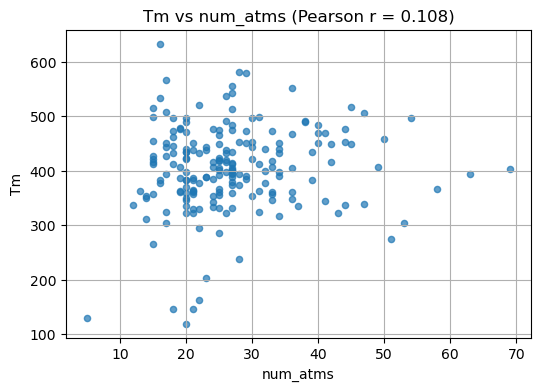

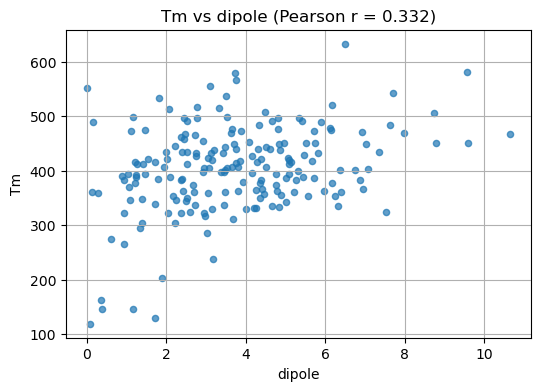

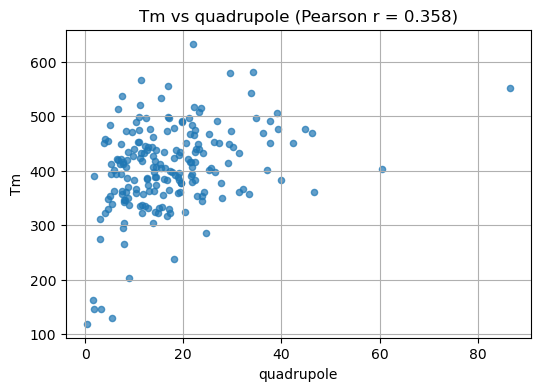

In [221]:
for feat in ['num_atms', 'dipole', 'quadrupole']:
    data = df_clean[['Tm', feat]].dropna()
    x = data[feat]
    y = data['Tm']
    r = x.corr(y)

    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.7, s=20)
    plt.title(f'Tm vs {feat} (Pearson r = {r:.3f})')
    plt.xlabel(feat)
    plt.ylabel('Tm')
    plt.grid(True)
    plt.show()

From the plots, diple and quadrupole exhibits the strongest visual correlation with Tm, which is consistent with the computed correlation coefficients in e.

**Part g**

In [222]:
lowest3 = df_clean.nsmallest(3, 'Tm').copy()
highest3 = df_clean.nlargest(3, 'Tm').copy()

lowest3_smiles = lowest3['smiles'].tolist()
highest3_smiles = highest3['smiles'].tolist()
print("Lowest 3 Tm SMILES:", lowest3_smiles)
print("Highest 3 Tm SMILES:", highest3_smiles)

print("\nLowest 3 Tm molecules:")
display(lowest3[['smiles'] + cols])
print("\nHighest 3 Tm molecules:")
display(highest3[['smiles'] + cols])

Lowest 3 Tm SMILES: ['CCCC(C)C', 'CF', 'CCC(CC)C=C']
Highest 3 Tm SMILES: ['NC1=NC2=C(N=CN2)C(=O)N1', 'NC1=C(C#N)C(=O)C2CC3=C(CN12)C=CC=C3', 'OC(=O)C1=CC(NC(=O)C2=CC=C(Br)C=C2)=CC=C1']

Lowest 3 Tm molecules:


,smiles,Tm,num_atms,dipole,quadrupole
12,CCCC(C)C,119.15,20.0,0.067055,0.366284
53,CF,130.15,5.0,1.700645,5.380003
85,CCC(CC)C=C,146.15,21.0,0.386677,1.692360



Highest 3 Tm molecules:


,smiles,Tm,num_atms,dipole,quadrupole
80,NC1=NC2=C(N=CN2)C(=O)N1,633.15,16.0,6.488483,21.894593
9,NC1=C(C#N)C(=O)C2CC3=C(CN12)C=CC=C3,581.15,28.0,9.580572,34.144607
197,OC(=O)C1=CC(NC(=O)C2=CC=C(Br)C=C2)=CC=C1,580.15,29.0,3.733080,29.455901



2D depictions (lowest 3):


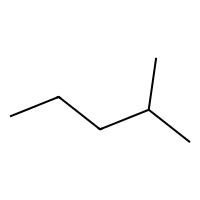

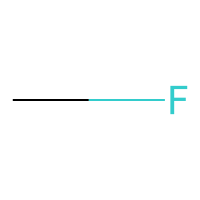

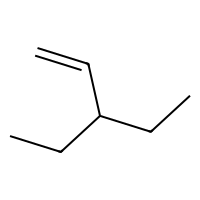


2D depictions (highest 3):


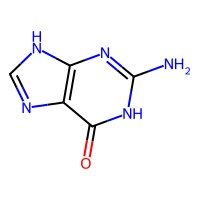

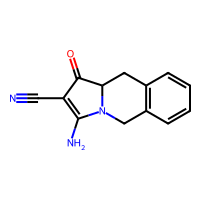

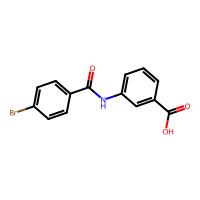

In [223]:
print("\n2D depictions (lowest 3):")
for sm in lowest3_smiles:
    mol = Chem.MolFromSmiles(sm)
    img = Chem.Draw.MolToImage(mol, size=(200, 200))
    display(img)

print("\n2D depictions (highest 3):")
for sm in highest3_smiles:
    mol = Chem.MolFromSmiles(sm)
    img = Chem.Draw.MolToImage(mol, size=(200, 200))
    display(img)

In [224]:
# Exploring extra functionalities from the rdkit.Chem module since this is new to me; I thought it was cool, so I pulled some descriptors to help me answer the qualitative question in part g.
from rdkit.Chem import Descriptors, rdMolDescriptors, rdchem

rows = pd.concat([lowest3, highest3], ignore_index=True)

descrs = []
for _, r in rows.iterrows():
    sm = r['smiles']
    m = Chem.MolFromSmiles(sm)
    if m is None:
        descrs.append({
            'smiles': sm, 'Tm': r['Tm'],
            'MolWt': None, 'HeavyAtoms': None,
            'NumRings': None, 'NumRotatable': None,
            'NumHDonors': None, 'NumHAcceptors': None,
            'BondSingle': None, 'BondDouble': None, 'BondTriple': None, 'BondAromatic': None
        })
        continue

    # bond counts
    single = 0
    double = 0
    triple = 0
    aromatic = 0
    for b in m.GetBonds():
        bt = b.GetBondType()
        if bt == rdchem.BondType.SINGLE:
            single += 1
        elif bt == rdchem.BondType.DOUBLE:
            double += 1
        elif bt == rdchem.BondType.TRIPLE:
            triple += 1
        # aromatic detection
        if b.GetIsAromatic():
            aromatic += 1

    descrs.append({
        'smiles': sm,
        'Tm': float(r['Tm']),
        'MolWt': float(Descriptors.MolWt(m)),
        'HeavyAtoms': int(m.GetNumHeavyAtoms()),
        'NumRings': int(rdMolDescriptors.CalcNumRings(m)),
        'NumRotatable': int(rdMolDescriptors.CalcNumRotatableBonds(m)),
        'NumHDonors': int(Descriptors.NumHDonors(m)),
        'NumHAcceptors': int(Descriptors.NumHAcceptors(m)),
        'BondSingle': int(single),
        'BondDouble': int(double),
        'BondTriple': int(triple),
        'BondAromatic': int(aromatic),
    })

descr_df = pd.DataFrame(descrs)
print("Descriptor table for lowest3 then highest3 (includes bond counts):")
display(descr_df)


Descriptor table for lowest3 then highest3 (includes bond counts):


,smiles,Tm,MolWt,HeavyAtoms,NumRings,NumRotatable,NumHDonors,NumHAcceptors,BondSingle,BondDouble,BondTriple,BondAromatic
0,CCCC(C)C,119.15,86.178,6,0,2,0,0,5,0,0,0
1,CF,130.15,34.033,2,0,0,0,0,1,0,0,0
2,CCC(CC)C=C,146.15,98.189,7,0,3,0,0,5,1,0,0
3,NC1=NC2=C(N=CN2)C(=O)N1,633.15,151.129,11,2,0,3,4,1,1,0,10
4,NC1=C(C#N)C(=O)C2CC3=C(CN12)C=CC=C3,581.15,225.251,17,3,0,1,4,10,2,1,6
5,OC(=O)C1=CC(NC(=O)C2=CC=C(Br)C=C2)=CC=C1,580.15,320.142,19,2,3,2,2,6,2,0,12


While I included multiple qualitative molecular descriptors from rd.Chem, it seems that molecular size (MolWt and HeavyAtoms) and intermolecular interactions (dipole, polarity,NumHDonors/NumHAcceptors) seem to most correlate with increasing Tm. The larger molecules have greater polarizability and more potential for London dispersion forces, both of which scale with the increased surface area from the presence of Heavy Atoms. This cohesive energy creates a crystal lattice that is more "tightly packed" which subsequently increases Tm relative to the smaller molecules. Going off of this, the number of polar functional groups and H-bond donors/acceptors also correlate with Tm. These atoms create strong dipole-dipole and hydrogen bonds that increase the cohesion energy which also raise Tm when compared to molecules with less of these types of atoms.